In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
sns.get_dataset_names()

C:\Users\xaidi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file C:\Users\xaidi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [8]:
df = sns.load_dataset('iris')

In [9]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
px.scatter(df, x='sepal_width',y='petal_width',color='species')

In [12]:
from sklearn.linear_model import LogisticRegression

In [24]:
xcol = df.columns.tolist()[:-1]
X = df[xcol]
scaler = StandardScaler()
x = scaler.fit_transform(X)

In [33]:
y = df['species'] 

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.2, random_state=0)

In [35]:
model =LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
ypred = model.predict(x)

In [38]:
confusion_matrix(y, ypred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)

# precision & recall
- ## precision
    - it tells us how many correct prediction cases actually turned out to be True
- ## recall
    - it tells how many actual corret predictions our algo preicts with the the model

In [39]:
print(classification_report(y,ypred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.94      0.95        50
   virginica       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



<AxesSubplot:xlabel='species', ylabel='count'>

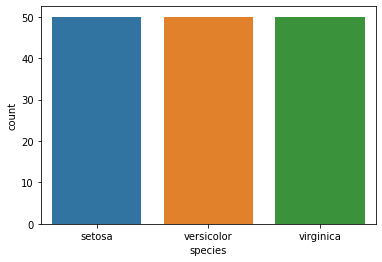

In [40]:
sns.countplot(x='species',data=df)